In [8]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np

In [9]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [10]:
data=pd.read_csv('./results/main_fixed.csv')

Wczytuję dane otrzymane z symulacji, w pliku są zawarte dane na temat ilości traderów (inteligentnych oraz losowych, sumują się do 600), korelacji pomiędzy cenami rynkowymi akcji i cenami symulowanymi oraz korelację pomiędzy cenami ropy naftowej a cenami rynkowymi akcji.

In [11]:
data.head()

,Unnamed: 0,corr_stocks,corr_oil,noisy_trader,przemek_trader,start_ind
0,0,-0.737928,0.813761,600,0,0
1,1,-0.673959,0.813761,550,50,0
2,2,-0.306098,0.813761,500,100,0
3,3,0.340609,0.813761,450,150,0
4,4,0.371500,0.813761,400,200,0


In [12]:
dsorted=data.sort_values(['corr_stocks'],ascending=False)
dsorted.head(20)

,Unnamed: 0,corr_stocks,corr_oil,noisy_trader,przemek_trader,start_ind
136,136,0.931536,0.688851,450,150,1900
134,134,0.912941,0.688851,550,50,1900
139,139,0.903925,0.688851,300,300,1900
14,14,0.891318,0.350167,600,0,200
137,137,0.886291,0.688851,400,200,1900
138,138,0.879189,0.688851,350,250,1900
82,82,0.861943,0.428886,350,250,1100
83,83,0.857508,0.428886,300,300,1100
91,91,0.853450,0.157819,600,0,1300
92,92,0.852747,0.157819,550,50,1300


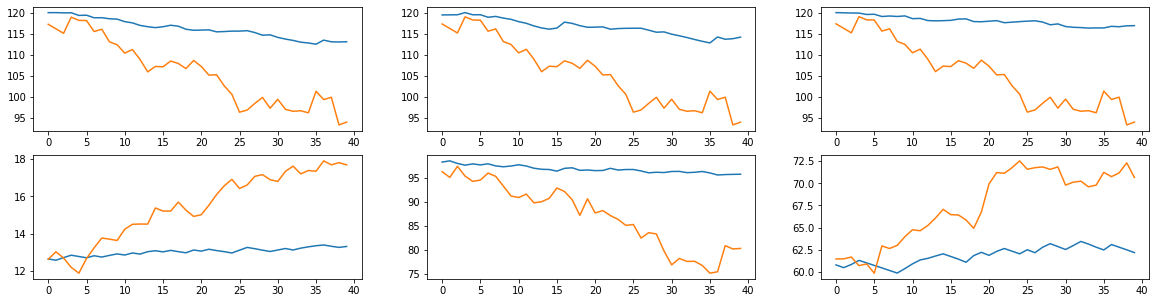

In [13]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axs = plt.subplots(2,3)
axs[0,0].plot(pd.read_csv('./results/136.csv',header=None)[[0,2]][5:].to_numpy())
axs[0,1].plot(pd.read_csv('./results/134.csv',header=None)[[0,2]][5:].to_numpy())
axs[0,2].plot(pd.read_csv('./results/139.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,0].plot(pd.read_csv('./results/14.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,1].plot(pd.read_csv('./results/82.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,2].plot(pd.read_csv('./results/91.csv',header=None)[[0,2]][5:].to_numpy())
plt.show()

Na powyższych wykresach przedstawionne są najlepsze symulacje (pod względem współczynnika korelacji)
pomarańczowy - rzeczywisty kurs
niebieski - symulacja

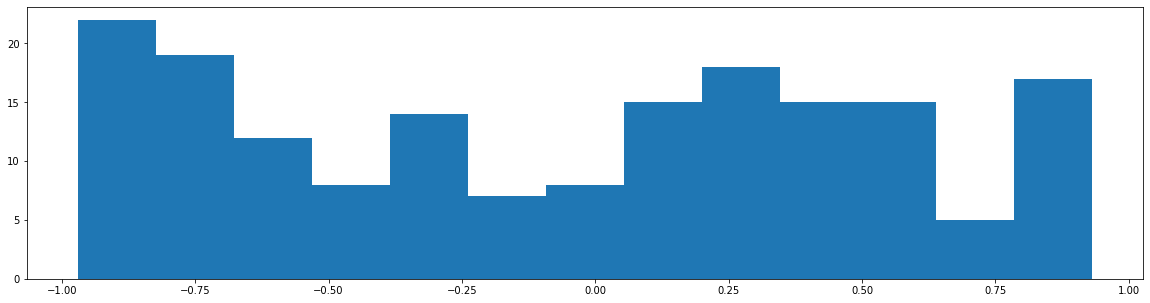

In [14]:
plt.hist(dsorted['corr_stocks'].to_numpy(),bins=13)
plt.show()

Histogram wskazuje na to, że 2 różne rodzaje symulacji zostały ze sobą zmieszane (histogram dwumodalny)
Poniżej analiza korelacji - Czy znak korelacji jest powiązany z ilością inteligentnych traderów?

In [15]:
a=dsorted.query('corr_stocks < 0').groupby('przemek_trader').count()
b=dsorted.query('corr_stocks > 0').groupby('przemek_trader').count()
display_side_by_side(a,b)

,Unnamed: 0,corr_stocks,corr_oil,noisy_trader,start_ind
przemek_trader,,,,,
0,9,9,9,9,9
50,11,11,11,11,11
100,12,12,12,12,12
150,15,15,15,15,15
200,13,13,13,13,13
250,14,14,14,14,14
300,13,13,13,13,13
,Unnamed: 0,corr_stocks,corr_oil,noisy_trader,start_ind
przemek_trader,,,,,


Dodanie inteligentnych traderów nie wpływa na znak współczynnika korelacji.

In [16]:
print(dsorted[['corr_stocks','start_ind']].query('corr_stocks < 0').count())
print(dsorted[['corr_stocks','start_ind']].query('corr_stocks > 0').count())

corr_stocks    87
start_ind      87
dtype: int64
corr_stocks    88
start_ind      88
dtype: int64


Powyższa tabela przedstawia odpowiednio ilość symulacji o ujemnej korelacji oraz o dodatnie korelacji. Prawie taka sama liczba symulacji ma korelację dodatnią i ujemną. Tabele poniżej przedstawiają (licząc od lewej):
1. indeks startowy | ilość symulacji z korelacją ujemnną
2. indeks startowy | ilość symulacji z dodatnią
3. indeks startowy | średnią wartość korelacji dla symulacji z tego indeksu startowego
4. indeks startowy | odchylenie standardowe od średniej
Dane zamieszczam tutaj tylko, aby je przedstawić, poniżej tych tabeli są zaprezentowane w postaci wykresu (zachęcam czytelnika do pominięcia tej komórki)

In [17]:
a=dsorted[['corr_stocks','start_ind']].query('corr_stocks < 0').groupby('start_ind').count()
b=dsorted[['corr_stocks','start_ind']].query('corr_stocks > 0').groupby('start_ind').count()
me=dsorted[['corr_stocks','start_ind']].groupby('start_ind').mean()
st=dsorted[['corr_stocks','start_ind']].groupby('start_ind').std()
display_side_by_side(a,b,me,st)

,corr_stocks
start_ind,
0,3
200,5
300,5
500,2
600,4
700,4
900,4
1000,2
1100,1


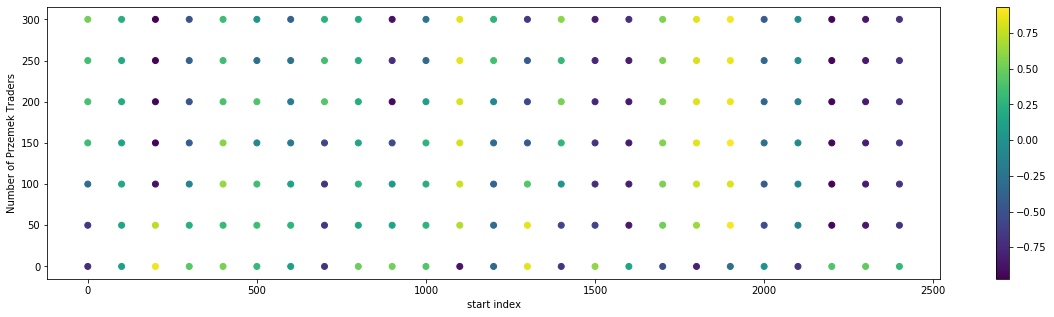

In [18]:
plt.scatter(x=data['start_ind'],y=data['przemek_trader'],c=data['corr_stocks'])
plt.xlabel('start index')
plt.ylabel('Number of Przemek Traders')
plt.colorbar()
plt.show()

Jak widać na powyższym wykresie (im punkt bardziej żółty tym wyższa korelacja) kolory punktów układają się w pionowe pasy. Wynika z tego, że model jest podatny na punkt startowy. Jednocześnie można wywnioskować, że liczba inteligentnych traderów nie jest bardzo znaczącym paramterem, ale jednocześnie widać, że jeżeli jest wysoka korelacja danych giełdowych i symulowanych dla symulacji o zerowej lub bliskiej zeru liczbie inteligentnych traderów to dla wysokiej liczby inteligentnych traderów korelacja będzie niska. Może to wynikać z faktu, że inteligentni traderzy wprowadzją do modelu mniej zakłóceń (zaokrąglają wykresy, kursy nie są takie kanciaste) natomiast traderzy losowi wprowadzają większą zmienność (dokładają kantów do wykresu). Dla różnych okresów symulacji różne strategie mogą okazać się przydatne.

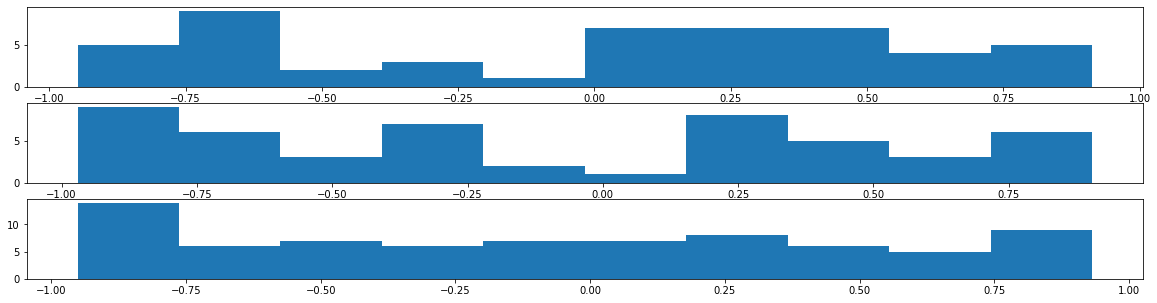

In [19]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axs = plt.subplots(3,1)
axs[0].hist(data.where(data['przemek_trader']<=50)['corr_stocks'].dropna().to_numpy())
axs[1].hist(data.where(data['przemek_trader']>=250)['corr_stocks'].dropna().to_numpy())
axs[2].hist(data.where(data['przemek_trader']<250).where(data['przemek_trader']>50)['corr_stocks'].dropna().to_numpy())
plt.show()

Powyższe histogramy przedstawiają histogramy dla inteligentnych traderów w ilości:
1. <0; 50>
2. <250; 300>
3. (50; 250)
Jak widać skrajne ilości inteligentnych traderów wprowadzają zakłócenia do modelu. W przypadku ich ilości w przedziale (50; 250) rozkład jest płaski z odchyleniami na początku i końcu histogramu. Z tego wynika, że należy wybrać model ze skrajną ilością traderów. W przypadku bardzo małej ilości inteligentnych traderów bardziej prawdopodobne jest uzyskanie dodatniej korelacji (co jest pożądane), aczkolwiek jest również większe prawdopodobieństwo uzyskania korelacji w okolicy 0. Natomiast postępując odwrotnie zmniejszamy prawdopodobieństwo uzyskania korelacji w okolicy 0, ale zmniejszamy prawdopodobieństwo uzyskania dodatniej korelacji.

Poniżej przedstawiam wykresy dla 
1. Symulacji o dużych wartościach współczynnika korelacji
2. Symulacji o małych wartościach współczynnika korelacji

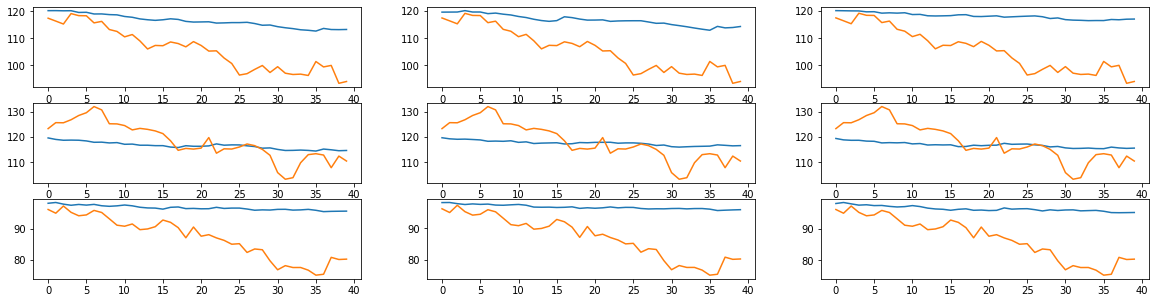

In [20]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axs = plt.subplots(3,3)
axs[0,0].plot(pd.read_csv('./results/136.csv',header=None)[[0,2]][5:].to_numpy())
axs[0,1].plot(pd.read_csv('./results/134.csv',header=None)[[0,2]][5:].to_numpy())
axs[0,2].plot(pd.read_csv('./results/139.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,0].plot(pd.read_csv('./results/129.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,1].plot(pd.read_csv('./results/132.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,2].plot(pd.read_csv('./results/131.csv',header=None)[[0,2]][5:].to_numpy())
axs[2,0].plot(pd.read_csv('./results/82.csv',header=None)[[0,2]][5:].to_numpy())
axs[2,1].plot(pd.read_csv('./results/83.csv',header=None)[[0,2]][5:].to_numpy())
axs[2,2].plot(pd.read_csv('./results/80.csv',header=None)[[0,2]][5:].to_numpy())
plt.show()

In [21]:
dsorted[-15:]

,Unnamed: 0,corr_stocks,corr_oil,noisy_trader,przemek_trader,start_ind
167,167,-0.855810,0.375957,300,300,2300
77,77,-0.871747,0.428886,600,0,1100
16,16,-0.882534,0.350167,500,100,200
69,69,-0.895923,0.097806,300,300,900
67,67,-0.921171,0.097806,400,200,900
157,157,-0.940221,0.143891,450,150,2200
18,18,-0.942571,0.350167,400,200,200
159,159,-0.942632,0.143891,350,250,2200
158,158,-0.942655,0.143891,400,200,2200
160,160,-0.943492,0.143891,300,300,2200


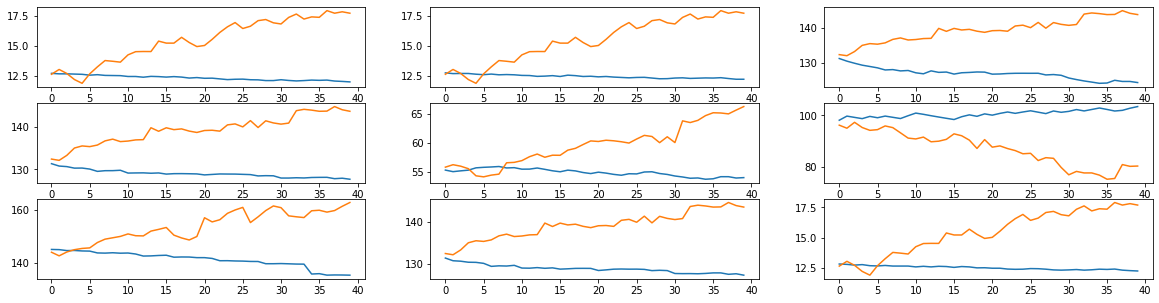

In [22]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axs = plt.subplots(3,3)
axs[0,0].plot(pd.read_csv('./results/20.csv',header=None)[[0,2]][5:].to_numpy())
axs[0,1].plot(pd.read_csv('./results/17.csv',header=None)[[0,2]][5:].to_numpy())
axs[0,2].plot(pd.read_csv('./results/155.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,0].plot(pd.read_csv('./results/160.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,1].plot(pd.read_csv('./results/67.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,2].plot(pd.read_csv('./results/77.csv',header=None)[[0,2]][5:].to_numpy())
axs[2,0].plot(pd.read_csv('./results/167.csv',header=None)[[0,2]][5:].to_numpy())
axs[2,1].plot(pd.read_csv('./results/159.csv',header=None)[[0,2]][5:].to_numpy())
axs[2,2].plot(pd.read_csv('./results/18.csv',header=None)[[0,2]][5:].to_numpy())
plt.show()

Poniżej przejrzałem kilka rekordów z tabeli.

In [23]:
dsorted[dsorted['Unnamed: 0'] == 20]

,Unnamed: 0,corr_stocks,corr_oil,noisy_trader,przemek_trader,start_ind
20,20,-0.970461,0.350167,300,300,200


In [24]:
dsorted[dsorted['Unnamed: 0'] == 120]

,Unnamed: 0,corr_stocks,corr_oil,noisy_trader,przemek_trader,start_ind
120,120,0.510695,0.56473,550,50,1700


Poniżej przedstawiam scatter plot danych z których liczę korelację oraz wykresy. W tym miejscu warto się zastanowić jak działa korelacja. Można ją przyrównać do dwóch równoległych prostych w odległości D od siebie. Pomiędzy tymi prostymi ma się znaleźć większość punktów, które wykreśliliśmy na scatter plot (tj cena z symulacji na osi X, cena rynkowa na osi Y). Im mniejsza wartość parametru D tym większa korelacja, ale cechą naturalną wykresów giełdowych jest duża zmienność i znaczne zmiany kursów. Nasza symulacja nie jest tak dokładna, jej celem jest nakreślenie trendu. Aby lepiej ocenić jej dokładność zostały wprowadzone dodatkowe miary.

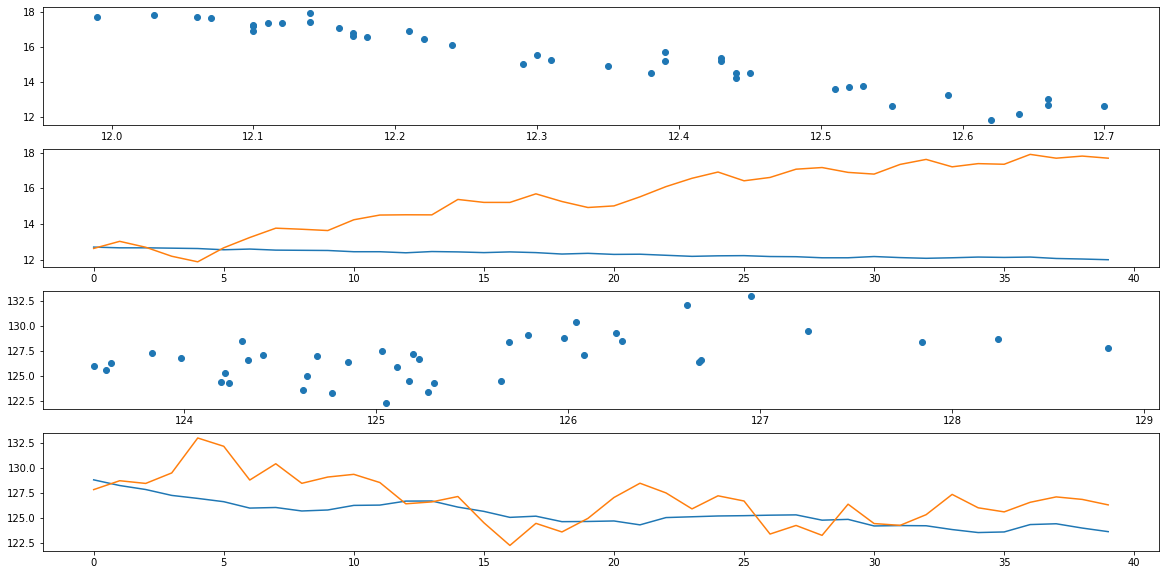

In [25]:
plt.rcParams["figure.figsize"] = (20,10)
tmp=pd.read_csv('./results/20.csv',header=None)[[0,2]][5:].to_numpy()
fig, axs = plt.subplots(4)
axs[0].scatter(tmp[:,0],tmp[:,1])
axs[1].plot(tmp)
tmp=pd.read_csv('./results/120.csv',header=None)[[0,2]][5:].to_numpy()
axs[2].scatter(tmp[:,0],tmp[:,1])
axs[3].plot(tmp)
plt.show()

Kolejno tymi miarami są:
1. mean absolute error
2. procent wzrostu
3. mean squared error

In [26]:
for i in range(175):
    file='./results/'+str(i)+'.csv'
    a=pd.read_csv(file,header=None)
    x,y=a[[0]].to_numpy().reshape(-1),a[[2]].to_numpy().reshape(-1)
    x,y=x[5:],y[5:]
    data.at[i,'mean_abs_err']=np.mean(np.abs(x-y))

In [27]:
for i in range(175):
    file='./results/'+str(i)+'.csv'
    a=pd.read_csv(file,header=None)
    x,y=a[[0]].to_numpy().reshape(-1),a[[2]].to_numpy().reshape(-1)
    x,y=x[5:],y[5:]
    data.at[i,'diff_start_end']=np.sign(y[-1]-x[-1])*(np.abs((x[0]-x[-1])/(y[0]-y[-1])))

In [28]:
for i in range(175):
    file='./results/'+str(i)+'.csv'
    a=pd.read_csv(file,header=None)
    x,y=a[[0]].to_numpy().reshape(-1),a[[2]].to_numpy().reshape(-1)
    x,y=x[5:],y[5:]
    data.at[i,'mean_sq_err']=np.mean(np.power(x-y,2))

/Users/przemek/anaconda3/envs/ML/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/przemek/anaconda3/envs/ML/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


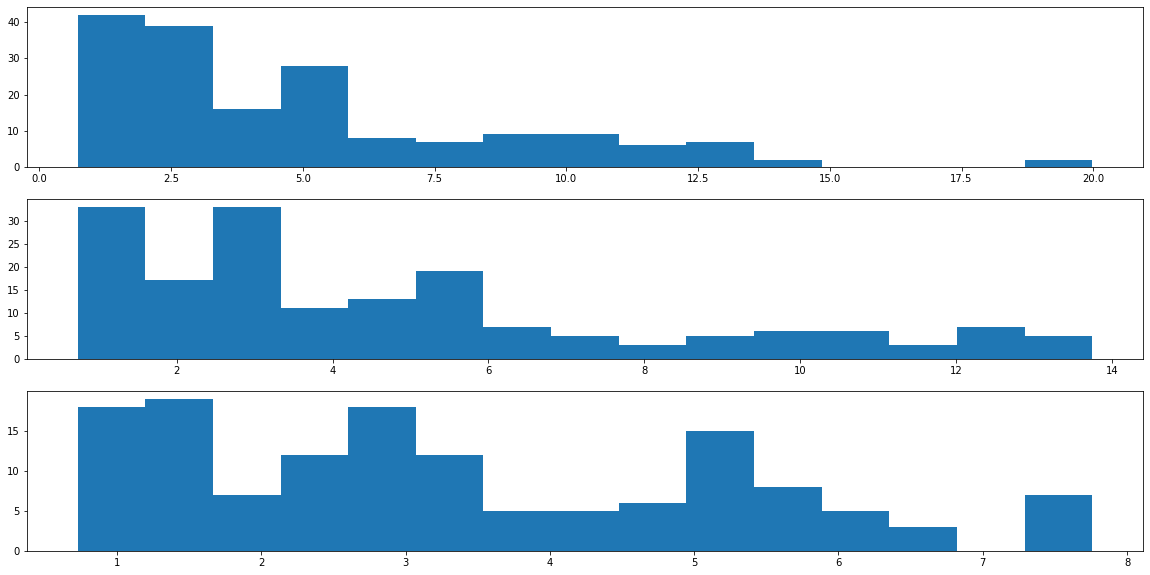

In [29]:
fig, axs = plt.subplots(3)
axs[0].hist(data['mean_abs_err'],bins=15)
axs[1].hist(data.where(data['mean_abs_err']<14)['mean_abs_err'],bins=15)
axs[2].hist(data.where(data['mean_abs_err']<8)['mean_abs_err'],bins=15)
plt.show()

Powyżej został naszkicowany histogram mean absolute error. Jego wartość jest łatwa do interpretacji, jest to średni błąd o jaki myliła się symulacja względem danych rzeczywistych (dla każdego punktu z symulacji). Warto dodać, że punktów w symulacji było 40, a pomimo to większość symulacji nie ma błędu większego niż 6$. Pokazuje to, że symulacje nie mają w sobie błędów systemowych, nie ma wartości skrajnie odbiegających. Poniżej został przedstawiony scatter plot przedstawiający na osi poziomej numer indeksu od którego startowała symulacja, na osi pionowej ilość inteligentnych traderów. 

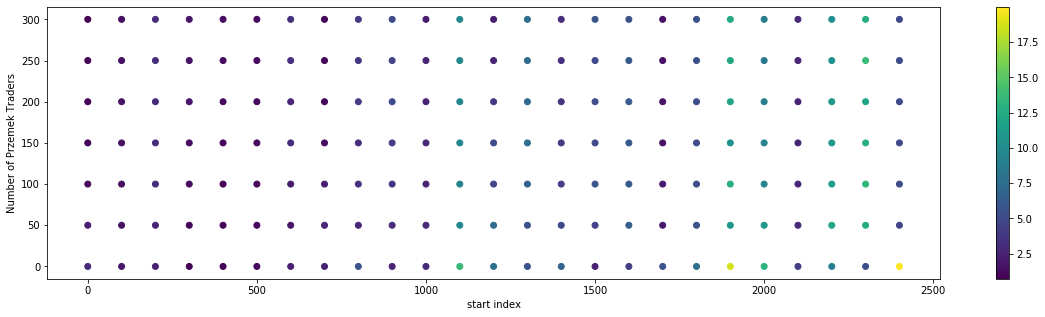

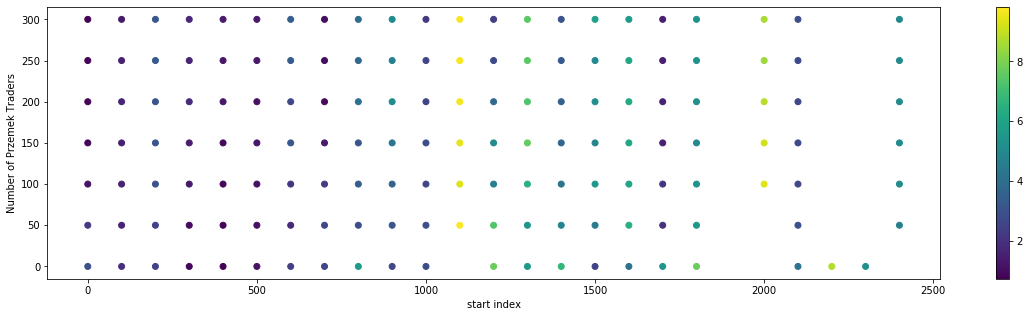

In [30]:
plt.rcParams["figure.figsize"] = (20,5)
plt.scatter(x=data['start_ind'],y=data['przemek_trader'],c=data['mean_abs_err'])
plt.xlabel('start index')
plt.ylabel('Number of Przemek Traders')
plt.colorbar()
plt.show()
plt.scatter(x=data.where(data["mean_abs_err"]<10)['start_ind'],y=data.where(data["mean_abs_err"]<10)['przemek_trader'],c=data.where(data["mean_abs_err"]<10)['mean_abs_err'])
plt.xlabel('start index')
plt.ylabel('Number of Przemek Traders')
plt.colorbar()
plt.show()

Poniżej znajduję się wykres cen ropy naftowej za okres, w którym wykonywaliśmy symulacje.

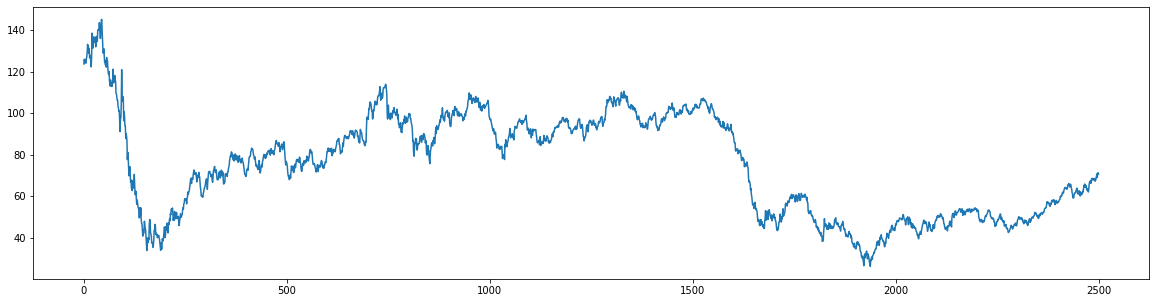

In [31]:
plt.plot(pd.read_csv('./data/OILdroped.csv')['Close'][0:2500])
plt.show()

Na drugim scatter plotie został przedstawione symulacje tylko z błędem poniżej 10$. Można znaleźć zależność, pomiędzy cenami ropy a dokładnościa symulacji ze względu na ten czynnik. Wyższa cena ropy sprawiała, że symulacje były bardziej dokładne, spadek jej ceny i ustabilizowanie się na nowym, niższym poziomie spowodował obniżenie dokładności. Jest to dobry znak, ponieważ manipulując współczynnikamim można je tak dobrać aby symulowały dany przedział czasowy (tzn można do dzisiejszych danych dopasować współczynniki i przewidywać przyszłe trendy na rynku akcji). Poniżej przedstawiam kilka wykresów z najniższymi wartościami tego współczynnika.

In [32]:
data.sort_values('mean_abs_err')[:20]

,Unnamed: 0,corr_stocks,corr_oil,noisy_trader,przemek_trader,start_ind,mean_abs_err,diff_start_end,mean_sq_err
6,6,0.527321,0.813761,300,300,0,0.727714,-0.661224,0.775423
5,5,0.359425,0.813761,350,250,0,0.808750,-0.734694,0.988207
28,28,0.544358,0.276316,600,0,400,0.816286,-3.640001,1.305812
29,29,0.314399,0.276316,550,50,400,0.820179,-3.562223,1.240858
4,4,0.371500,0.813761,400,200,0,0.833750,-0.628571,1.044202
21,21,0.436811,0.203985,600,0,300,0.843643,0.131442,1.277754
3,3,0.340609,0.813761,450,150,0,0.857750,-0.714285,1.154579
30,30,0.635614,0.276316,500,100,400,0.861643,-1.120000,1.064089
53,53,0.424476,0.614295,400,200,700,0.956107,19.510597,1.319095
31,31,0.589023,0.276316,450,150,400,0.972893,-0.777778,1.384090


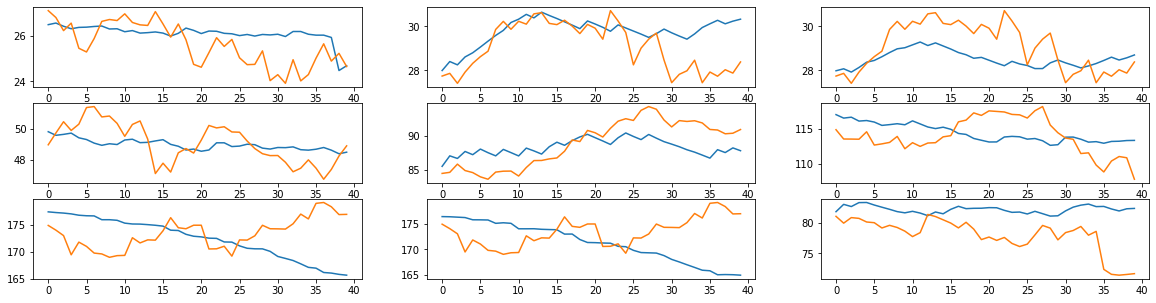

In [33]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axs = plt.subplots(3,3)
axs[0,0].plot(pd.read_csv('./results/5.csv',header=None)[[0,2]][5:].to_numpy())
axs[0,1].plot(pd.read_csv('./results/28.csv',header=None)[[0,2]][5:].to_numpy())
axs[0,2].plot(pd.read_csv('./results/30.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,0].plot(pd.read_csv('./results/53.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,1].plot(pd.read_csv('./results/105.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,2].plot(pd.read_csv('./results/150.csv',header=None)[[0,2]][5:].to_numpy())
axs[2,0].plot(pd.read_csv('./results/174.csv',header=None)[[0,2]][5:].to_numpy())
axs[2,1].plot(pd.read_csv('./results/170.csv',header=None)[[0,2]][5:].to_numpy())
axs[2,2].plot(pd.read_csv('./results/100.csv',header=None)[[0,2]][5:].to_numpy())
plt.show()

Poniżej naszkicowany został histogram współczynnika nazwanego roboczo procent wzrostu. Wartość ujemna mówi o tym czy symulacja zawyżyła na końcu symulacji cenę akcji czy w przypadku dodatnim zaniżyła. (Współczynnik ten jest ilorazem różnicy ceny na początku i na końcu symulacji do różnicy ceny giełdowej na początku i końcu analogicznego okresu.) Najlepiej, jeżeli ten współczynnik ma wartość dodatnią około 1. Dzięki temu jest wiadome, że cena jest raczej zaniżona, a wzrosty są podobne 

/Users/przemek/anaconda3/envs/ML/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/przemek/anaconda3/envs/ML/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


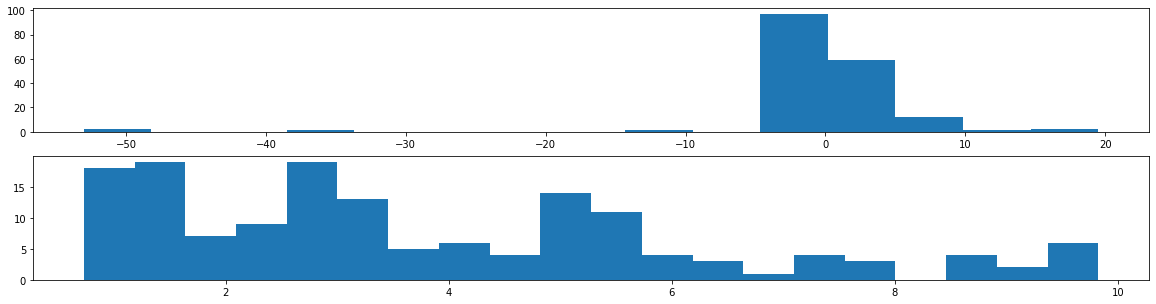

In [34]:
fig, axs = plt.subplots(2)
axs[0].hist(data['diff_start_end'],bins=15)
axs[1].hist(data.where(data['mean_abs_err']>-5).where(data['mean_abs_err']<10)['mean_abs_err'],bins=20)
plt.show()

In [42]:
np.abs(np.log(np.abs(data['mean_sq_err']))).sort_values().head(20)

5     0.011864
4     0.043253
30    0.062119
3     0.143736
29    0.215803
21    0.245104
6     0.254347
28    0.266825
53    0.276946
31    0.325043
55    0.385857
54    0.402589
37    0.475070
36    0.480013
22    0.524684
35    0.557376
39    0.659426
2     0.731526
33    0.879204
38    0.881401
Name: mean_sq_err, dtype: float64

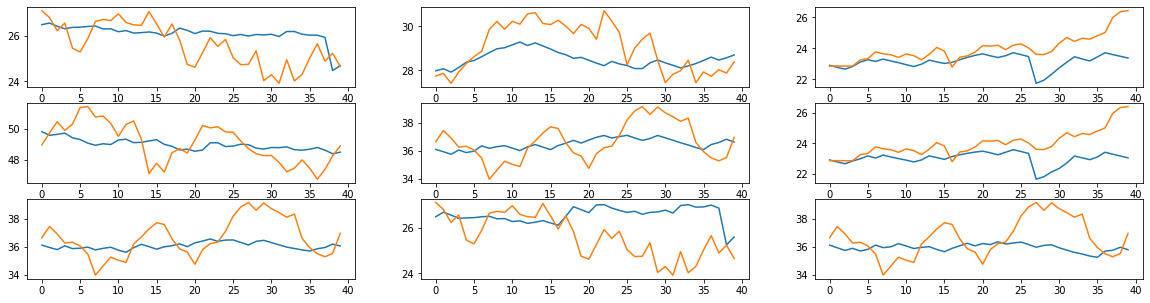

In [43]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axs = plt.subplots(3,3)
axs[0,0].plot(pd.read_csv('./results/5.csv',header=None)[[0,2]][5:].to_numpy())
axs[0,1].plot(pd.read_csv('./results/30.csv',header=None)[[0,2]][5:].to_numpy())
axs[0,2].plot(pd.read_csv('./results/21.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,0].plot(pd.read_csv('./results/53.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,1].plot(pd.read_csv('./results/37.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,2].plot(pd.read_csv('./results/22.csv',header=None)[[0,2]][5:].to_numpy())
axs[2,0].plot(pd.read_csv('./results/39.csv',header=None)[[0,2]][5:].to_numpy())
axs[2,1].plot(pd.read_csv('./results/2.csv',header=None)[[0,2]][5:].to_numpy())
axs[2,2].plot(pd.read_csv('./results/38.csv',header=None)[[0,2]][5:].to_numpy())
plt.show()

Jak widać współczynnik ten pokrywa się z przewidywaniami mean absolute error oraz nie jest odporny na duże odchylenia realnych kursów od symulowanych, przez co została wprowadzona dodatkowa miara mean squared error, która wykrywa takie zależności. W jej przypdaku błąd jest większy niż w mean absolute error, ponieważ jest to suma kwadratów, co przekłada się na trudną interpretację tej miary. 

/Users/przemek/anaconda3/envs/ML/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/przemek/anaconda3/envs/ML/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


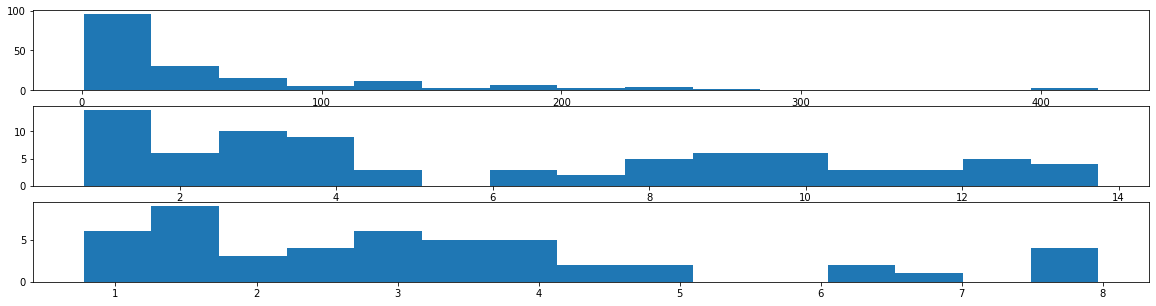

In [45]:
fig, axs = plt.subplots(3)
axs[0].hist(data['mean_sq_err'],bins=15)
axs[1].hist(data.where(data['mean_sq_err']<14)['mean_sq_err'],bins=15)
axs[2].hist(data.where(data['mean_sq_err']<8)['mean_sq_err'],bins=15)
plt.show()

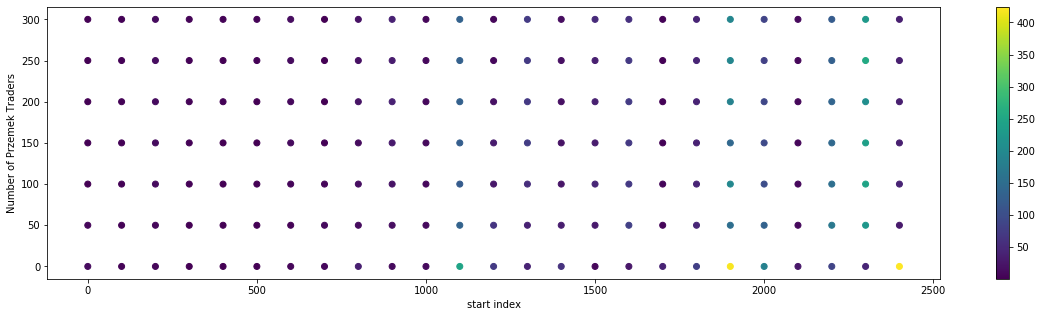

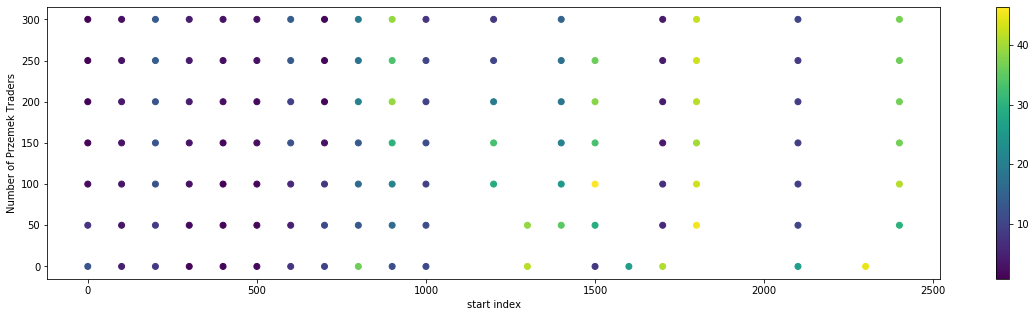

In [50]:
plt.rcParams["figure.figsize"] = (20,5)
plt.scatter(x=data['start_ind'],y=data['przemek_trader'],c=data['mean_sq_err'])
plt.xlabel('start index')
plt.ylabel('Number of Przemek Traders')
plt.colorbar()
plt.show()
plt.scatter(x=data.where(data["mean_sq_err"]<50)['start_ind'],y=data.where(data["mean_sq_err"]<50)['przemek_trader'],c=data.where(data["mean_sq_err"]<50)['mean_sq_err'])
plt.xlabel('start index')
plt.ylabel('Number of Przemek Traders')
plt.colorbar()
plt.show()

Na powyżsdzym scatter plotie również można znaleźć zależność pomiędzy wartością miary, a ceną ropy naftowej, chociaż nie jest ona tak widoczna

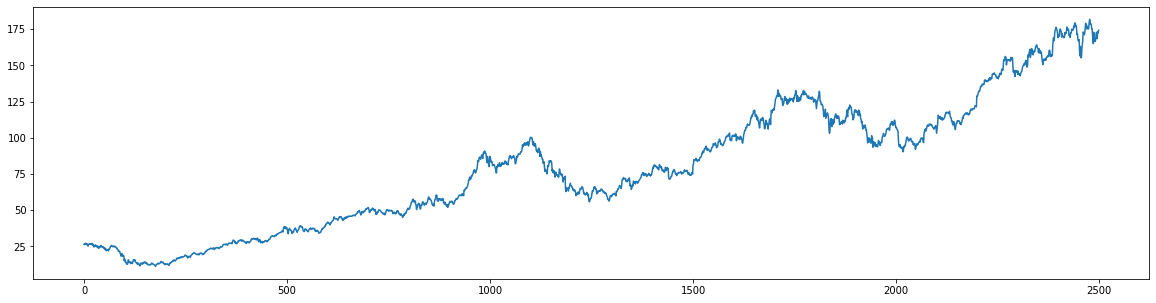

In [55]:
plt.plot(pd.read_csv('./data/AAPL.csv')['Close'][0:2500])
plt.show()

Powyżej przedstawiono wykres cen giełdowych za analogiczny okres. Jak widać dokładność załamuje się w momencie spadków na giełdzie. Naturalnym stanem rzeczy na giełdzie jest to, że wzrosty są powolne i długotrawłe, natomiast spadki krótkie i o dużą wartość. 

In [56]:
data.sort_values('mean_sq_err')[:20]

,Unnamed: 0,corr_stocks,corr_oil,noisy_trader,przemek_trader,start_ind,mean_abs_err,diff_start_end,mean_sq_err
6,6,0.527321,0.813761,300,300,0,0.727714,-0.661224,0.775423
5,5,0.359425,0.813761,350,250,0,0.808750,-0.734694,0.988207
4,4,0.371500,0.813761,400,200,0,0.833750,-0.628571,1.044202
30,30,0.635614,0.276316,500,100,400,0.861643,-1.120000,1.064089
3,3,0.340609,0.813761,450,150,0,0.857750,-0.714285,1.154579
29,29,0.314399,0.276316,550,50,400,0.820179,-3.562223,1.240858
21,21,0.436811,0.203985,600,0,300,0.843643,0.131442,1.277754
28,28,0.544358,0.276316,600,0,400,0.816286,-3.640001,1.305812
53,53,0.424476,0.614295,400,200,700,0.956107,19.510597,1.319095
31,31,0.589023,0.276316,450,150,400,0.972893,-0.777778,1.384090


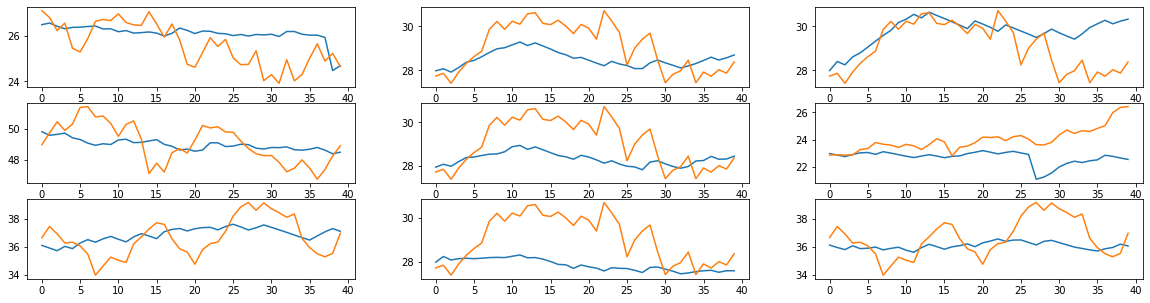

In [57]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axs = plt.subplots(3,3)
axs[0,0].plot(pd.read_csv('./results/5.csv',header=None)[[0,2]][5:].to_numpy())
axs[0,1].plot(pd.read_csv('./results/30.csv',header=None)[[0,2]][5:].to_numpy())
axs[0,2].plot(pd.read_csv('./results/28.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,0].plot(pd.read_csv('./results/53.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,1].plot(pd.read_csv('./results/31.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,2].plot(pd.read_csv('./results/23.csv',header=None)[[0,2]][5:].to_numpy())
axs[2,0].plot(pd.read_csv('./results/36.csv',header=None)[[0,2]][5:].to_numpy())
axs[2,1].plot(pd.read_csv('./results/33.csv',header=None)[[0,2]][5:].to_numpy())
axs[2,2].plot(pd.read_csv('./results/39.csv',header=None)[[0,2]][5:].to_numpy())
plt.show()

Powyżej zostały przedstawione wykresy z najlepszych symulacji pod względem mean squared error. Pokrywają się one znowu z wcześniejszymi miarami. 
W tym miejscu chciałbym wspomnieć jeszcze o zachowaniach na giełdzie. Napisałem już o spadkach i wzorstach i ich charakterystyce. Jest to typowe ludzkie zachowanie, którego nie symulowaliśmy ze względu na koszt obliczeniowy. Wprowadzeni do modeli inteligentnych modelu reinforcement learning pozwoliłoby wprowadzić takie odwzorowanie co zwiększyłoby wartość symulacji.